In [2]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
# Create a path to the csv and read it into a Pandas DataFrame
csv_path = "COVID-19_Vaccination_Age_and_Sex_Trends_in_the_United_States__National_and_Jurisdictional.csv"
df = pd.read_csv(csv_path)

df.head()

C:\Users\zaner\AppData\Local\Temp\ipykernel_2704\1372531761.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


,Date,Location,Demographic_Category,census,Administered_Dose1,Series_Complete_Yes,Booster_Doses,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Booster_Doses_Vax_pct_agegroup
0,01/02/2021 12:00:00 AM,HI,Ages_25-39_yrs,"296,866","11,344",567,0.0,3.8,0.2,0.0
1,01/02/2021 12:00:00 AM,OR,Ages_25-39_yrs,"901,825","25,769",20,0.0,2.9,0.0,0.0
2,01/02/2021 12:00:00 AM,SD,Male_Ages_<5yrs,"31,383",NaN,NaN,NaN,NaN,NaN,NaN
3,01/02/2021 12:00:00 AM,CA,Male_Ages_<5yrs,"1,220,085",NaN,NaN,NaN,NaN,NaN,NaN
4,01/02/2021 12:00:00 AM,UT,Female_Ages_18-24_yrs,"177,306","4,448",26,0.0,2.5,0.0,0.0


In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')
#01/02/2021 12:00:00 AM

In [27]:
#df["Demographic_Category"] = df["Demographic_Category"].replace(["Female_Ages_<5yrs","Female_Ages_5-11_yrs","Female_Ages_12-17_yrs","Female_Ages_18-24_yrs","Female_Ages_25-39_yrs","Female_Ages_25-49_yrs","Female_Ages_40-49_yrs","Female_Ages_50-64_yrs","Female_Ages_65-74_yrs","Female_Ages_75+_yrs","Female_Ages_65+_yrs"],["Female","Female","Female","Female","Female","Female","Female","Female","Female","Female","Female"])
#df["Demographic_Category"] = df["Demographic_Category"].replace(["Male_Ages_<5yrs","Male_Ages_5-11_yrs","Male_Ages_12-17_yrs","Male_Ages_18-24_yrs","Male_Ages_25-39_yrs","Male_Ages_25-49_yrs","Male_Ages_40-49_yrs","Male_Ages_50-64_yrs","Male_Ages_65-74_yrs","Male_Ages_75+_yrs","Male_Ages_65+_yrs"],["Male","Male","Male","Male","Male","Male","Male","Male","Male","Male","Male"])
#df["Demographic_Category"] = df["Demographic_Category"].replace(["Ages_25-39_yrs", "Ages_5-11_yrs", "Ages_18-24_yrs","Ages_40-49_yrs", "Ages_65-74_yrs", "Ages_65+_yrs", "Ages_12-17_yrs", "Ages_25-49_yrs", "Ages_50-64_yrs", "Ages_75+_yrs"],["Null","Null","Null","Null","Null","Null","Null","Null","Null","Null"])
df['Week_Number'] = df['Date'].dt.strftime('%U')


In [28]:
#df = df[~df.isin(['Female']).any(axis=1)]
#df = df[~df.isin(['Male']).any(axis=1)]
#df = df[~df.isin(['Null']).any(axis=1)]

In [7]:
femalelocation_df = df.loc[df["Location"] == "US"]
malelocation_df = df.loc[df["Location"] == "US"]

In [24]:
malelocation_df

,Date,Location,Demographic_Category,census,Administered_Dose1,Series_Complete_Yes,Booster_Doses,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Booster_Doses_Vax_pct_agegroup,Week_Number
153,2021-01-02,US,Ages_50-64_yrs,"63,659,835","1,727,481","17,300",0.0,2.7,0.0,0.0,00
189,2021-01-02,US,Male_Ages_18-24_yrs,"15,638,596","75,313",624,0.0,0.5,0.0,0.0,00
227,2021-01-02,US,Sex_Unknown,NaN,"207,917",433,0.0,NaN,NaN,0.0,00
254,2021-01-02,US,Sex_Female,"168,546,343","3,689,996","33,621",0.0,2.2,0.0,0.0,00
296,2021-01-02,US,Age_Unknown,NaN,638,0,0.0,NaN,NaN,0.0,00
...,...,...,...,...,...,...,...,...,...,...,...
805603,2021-12-30,US,Male_Ages_65+_yrs,"24,394,302","25,031,389","21,809,494","13,419,801",95.0,89.4,61.5,52
805691,2021-12-30,US,Female_Ages_5-11_yrs,"14,060,489","3,585,956","2,306,437",0,25.5,16.4,0.0,52
805701,2021-12-30,US,Male_Ages_<5yrs,"10,094,777",NaN,NaN,NaN,NaN,NaN,NaN,52
805706,2021-12-30,US,Female_Ages_18-24_yrs,"14,946,830","11,396,369","9,494,340","1,888,570",76.2,63.5,19.9,52


In [9]:
female_df = femalelocation_df.loc[df["Demographic_Category"] == "Sex_Female"]
male_df = malelocation_df.loc[df["Demographic_Category"] == "Sex_Male"]

Index(['Administered_Dose1'], dtype='object')

In [10]:
female_df['Administered_Dose1'] = female_df['Administered_Dose1'].str.replace(",","").astype(int)
male_df['Administered_Dose1'] = male_df['Administered_Dose1'].str.replace(",","").astype(int)

C:\Users\zaner\AppData\Local\Temp\ipykernel_2704\2560509518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_df['Administered_Dose1'] = female_df['Administered_Dose1'].str.replace(",","").astype(int)
C:\Users\zaner\AppData\Local\Temp\ipykernel_2704\2560509518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_df['Administered_Dose1'] = male_df['Administered_Dose1'].str.replace(",","").astype(int)


,Administered_Dose1
Date,
2021-01-03,2039093
2021-01-10,3629873
2021-01-17,5955534
2021-01-24,8695055
2021-01-31,11680040
2021-02-07,14652328
2021-02-14,17760357
2021-02-21,19914094
2021-02-28,23267267


In [11]:

last_row_female_df = female_df.iloc[-1]
last_row_female_df['Administered_Dose1']


126239799

In [12]:
last_row_male_df = male_df.iloc[-1]
last_row_male_df['Administered_Dose1']


115421583

<function matplotlib.pyplot.show(close=None, block=None)>

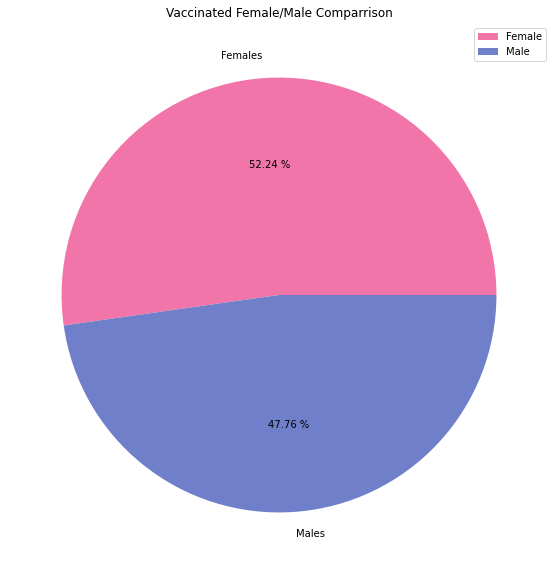

In [13]:
#set size of pie
plt.figure(figsize=(10,10))

#count the sum of rows in Administred_dose1 and have female 
female_pie = last_row_female_df['Administered_Dose1']
male_pie = last_row_male_df['Administered_Dose1']

#label female and malle and also set color 
labels = ['Females', 'Males']
colors = ['#F175A9', '#6F7FCA']

#pie chart comparrison from male to female, followed by labels, and color
plt.pie([female_pie, male_pie], labels=labels, colors=colors, autopct='%.2f %%')

#set title 
plt.title('Vaccinated Female/Male Comparrison')

#set Legend
plt.legend(["Female","Male"])

#save image 
plt.savefig('Pie_Graph.jpeg')

#show results 
plt.show

#labels=gender_type_count.index
#plt.pie([female_pie, male_pie], labels, colors=colors, autopct='%.2f %%')

In [14]:

male_df.set_index('Date', inplace=True)

male_df = male_df['Administered_Dose1'].resample('W').max()


In [15]:
female_df.set_index('Date', inplace=True)

female_df = female_df['Administered_Dose1'].resample('W').max()


In [16]:
female_df = pd.DataFrame(female_df)
male_df = pd.DataFrame(male_df)
female_df.reset_index()
male_df.reset_index()

,Date,Administered_Dose1
0,2021-01-03,2039093
1,2021-01-10,3629873
2,2021-01-17,5955534
3,2021-01-24,8695055
4,2021-01-31,11680040
5,2021-02-07,14652328
6,2021-02-14,17760357
7,2021-02-21,19914094
8,2021-02-28,23267267
9,2021-03-07,27914331


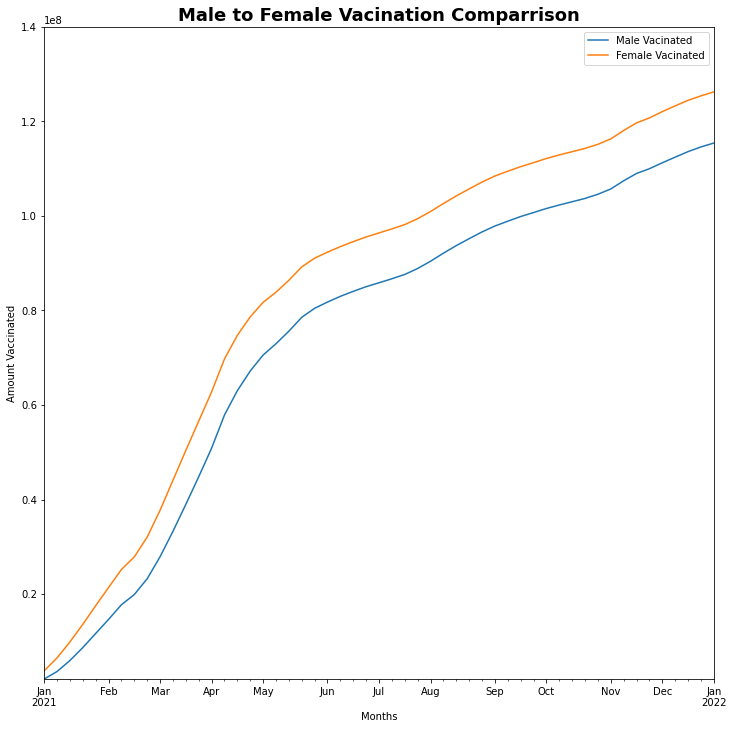

In [34]:




plt.figure(figsize=(12,12))
plt.title('Male to Female Vacination Comparrison', fontdict={'fontweight':'bold', 'fontsize': 18})
hi = male_df['Administered_Dose1'].plot(label='Male Vacinated')
bye = female_df['Administered_Dose1'].plot(label='Female Vacinated')

plt.xlabel('Months')
plt.ylabel('Amount Vaccinated')
plt.savefig('Male_AND_FEMALE.jpeg', dpi=300)
plt.ylim(2000000, 140000000)
plt.legend()

In [18]:
#male_df1 = malelocation_df.loc[df["Demographic_Category"] == "Sex_Male"]
#female_df1 = femalelocation_df.loc[df["Demographic_Category"] == "Sex_Female"]

In [19]:
#male_df1['Administered_Dose1'] = male_df1['Administered_Dose1'].str.replace(",","").astype(int)
#female_df1['Administered_Dose1'] = female_df1['Administered_Dose1'].str.replace(",","").astype(int)

In [20]:


#plt.figure(figsize=(17,17))
#plt.title('Male to Female Vacination Comparrison')
#plt.plot(male_df1.Week_Number, male_df1.Administered_Dose1)
#plt.plot(female_df1.Week_Number, female_df1.Administered_Dose1)
#plt.legend()
#plt.show

In [21]:
male_df

,Administered_Dose1
Date,
2021-01-03,2039093
2021-01-10,3629873
2021-01-17,5955534
2021-01-24,8695055
2021-01-31,11680040
2021-02-07,14652328
2021-02-14,17760357
2021-02-21,19914094
2021-02-28,23267267
